# 0.0 - Import Libraries 

In [1]:
#manipulação dos dados 
import pandas as pd 
import numpy as np

#plots 
import plotly.express as px
import seaborn as sns 
from matplotlib import pyplot as plt 

#Algoritmos 
from sklearn import neighbors as nb
from sklearn import tree as tr 
from sklearn import ensemble as en
from sklearn import metrics as mt 
from sklearn import linear_model as lm

# Notebook Configuration
plt.style.use( 'ggplot' )
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 16

# 1.0 Import Datasets 

In [2]:
# X variables 

X_train_raw = pd.read_csv('X_training.csv', low_memory=False)
X_vali_raw = pd.read_csv('X_validation.csv', low_memory=False)
X_test_raw = pd.read_csv('X_test.csv', low_memory=False)

# Y variables 

y_train = np.ravel(pd.read_csv('y_training.csv', low_memory=False))
y_vali = np.ravel(pd.read_csv('y_validation.csv', low_memory=False))
y_test = np.ravel(pd.read_csv('y_test.csv', low_memory=False))

# 2.0 Data Preparation

**Algorithms:** KNN, Decision Tree, Random Forest e Logistic Regression 
**Performance metrics:** Accuracy, Precision, Recall e F1-Score

In [3]:
print(X_train_raw.shape , y_train.shape)

(72515, 25) (72515,)


In [4]:
print(X_vali_raw.shape, y_vali.shape)

(31079, 25) (31079,)


In [5]:
print(X_test_raw.shape, y_test.shape)

(25893, 25) (25893,)


<Axes: >

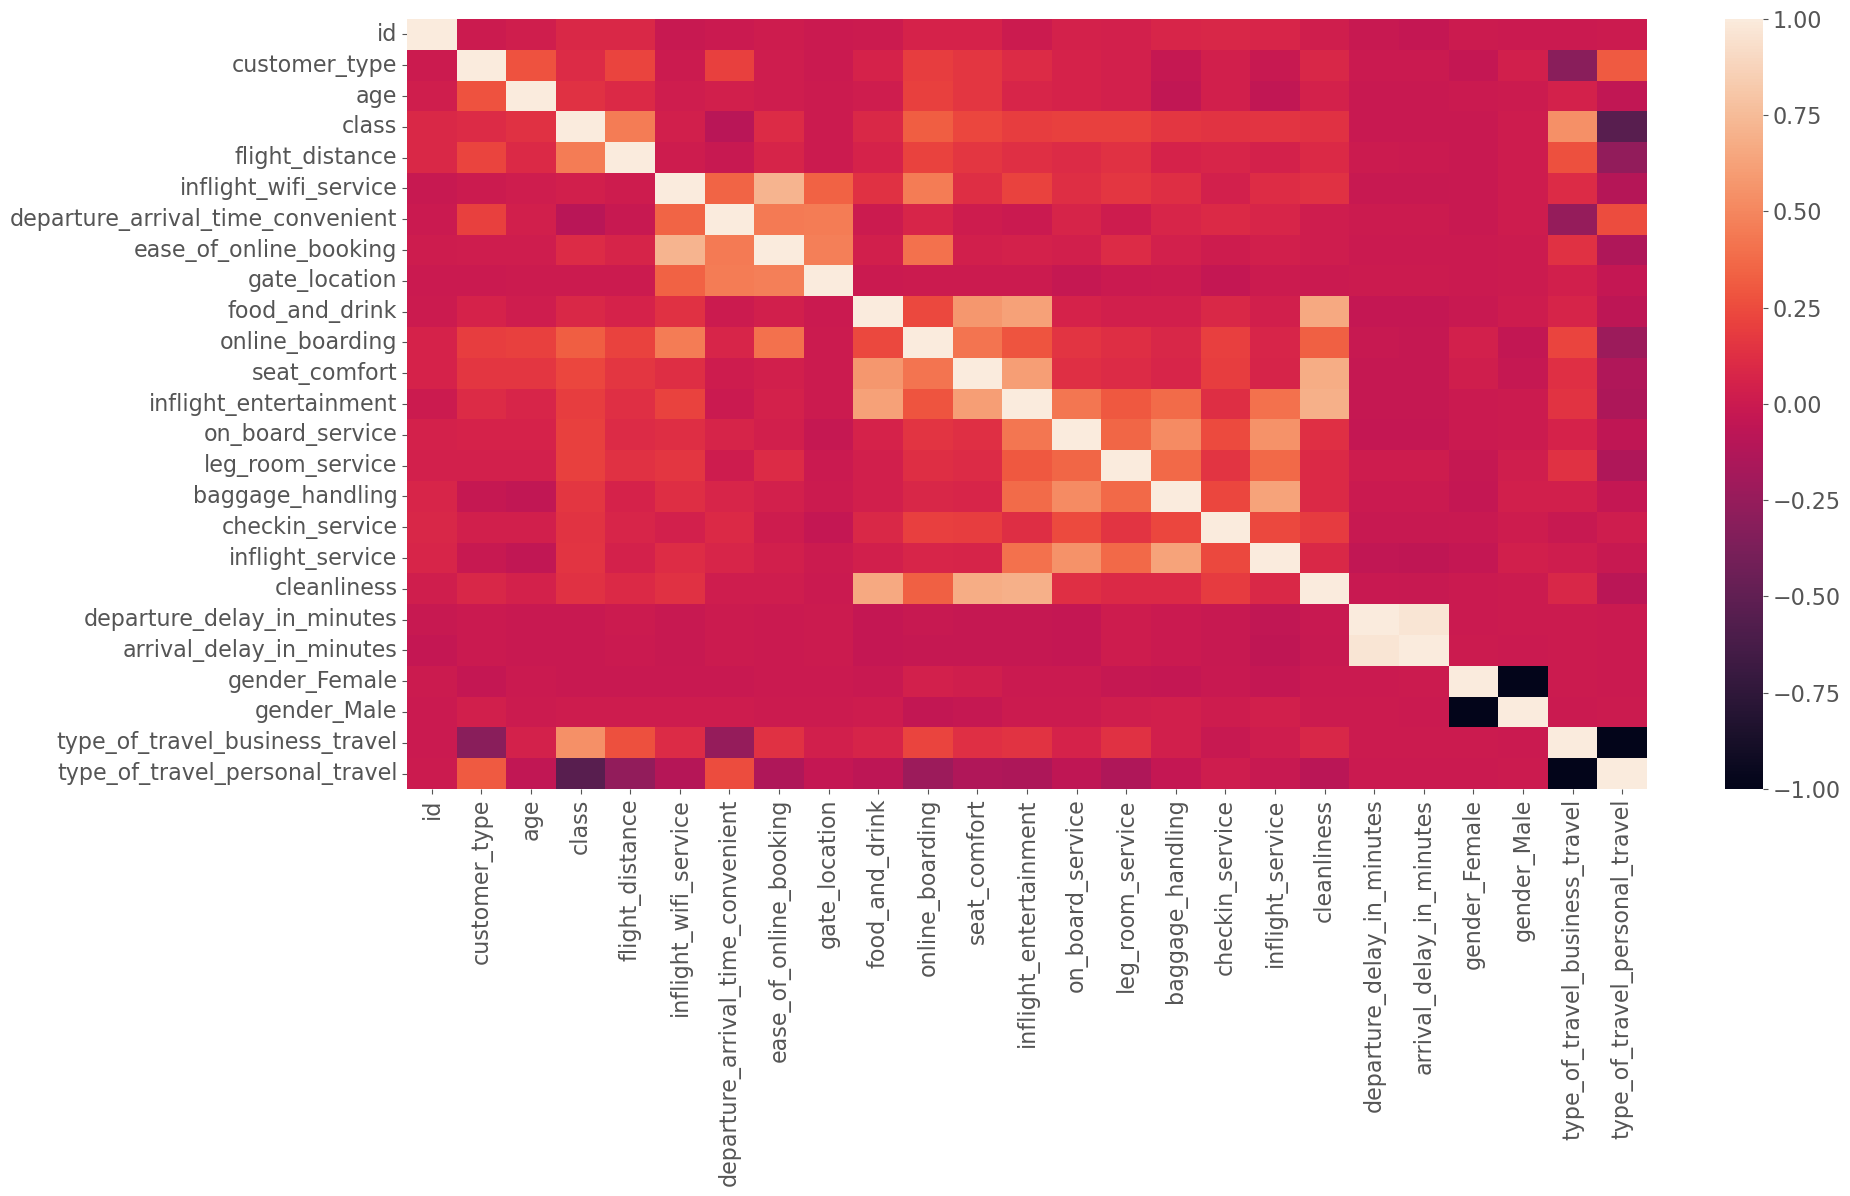

In [6]:
sns.heatmap(X_train_raw.corr(method='pearson'))

# 3.0 Classification Model Implementations

## 3.1 Features Selection 

In [7]:
all_features = ['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

selected_features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'departure_delay_in_minutes', 
       'arrival_delay_in_minutes', 'gender_Female', 'gender_Male', 
       'type_of_travel_personal_travel']

In [8]:
X_train = X_train_raw[selected_features]
X_vali = X_vali_raw[selected_features]
X_test = X_test_raw[selected_features]

## 3.2 - KNN ( K-Nearest Neighbors )

### 3.2.1 - Finding the best value for K 

In [9]:
k_values = range(1,18)
results_train_knn = pd.DataFrame()

for k in k_values:
    #print(f'O atual valor de k é: {k}')
    
    # Model definition 
    knn = nb.KNeighborsClassifier(n_neighbors=k)
    
    # Model Training 
    knn.fit(X_train, y_train)
    
    # Model Performance
    ypred_train = knn.predict(X_train)
    
    # Metrics 
    knn_train_accuracy = mt.accuracy_score(y_train, ypred_train)
    knn_train_precision = mt.precision_score(y_train, ypred_train)
    knn_train_recall = mt.recall_score(y_train, ypred_train)
    knn_train_F1 = mt.f1_score(y_train, ypred_train)
    
    # Results
    results_train = pd.Series([k, knn_train_precision, knn_train_accuracy, knn_train_recall, knn_train_F1])
    
    #Data frames concat 
    results_train_knn = pd.concat([results_train_knn, results_train], axis=1)
    
results_train_knn.index = [ 'k_value', 'accuracy', 'precision', 'recall', 'F1']
results_train_knn.columns = k_values
results_train_knn = results_train_knn.T
results_train_knn = results_train_knn.round(3)

In [10]:
results_train_knn

,k_value,accuracy,precision,recall,F1
1,1.0,1.000,1.000,1.000,1.000
2,2.0,1.000,0.949,0.883,0.938
3,3.0,0.974,0.958,0.928,0.951
4,4.0,0.985,0.943,0.881,0.930
5,5.0,0.969,0.948,0.910,0.939
6,6.0,0.980,0.940,0.879,0.927
7,7.0,0.968,0.943,0.899,0.932
8,8.0,0.977,0.937,0.876,0.924
9,9.0,0.967,0.940,0.892,0.928
10,10.0,0.973,0.935,0.875,0.922


### 3.2.2 - Ploting Results 

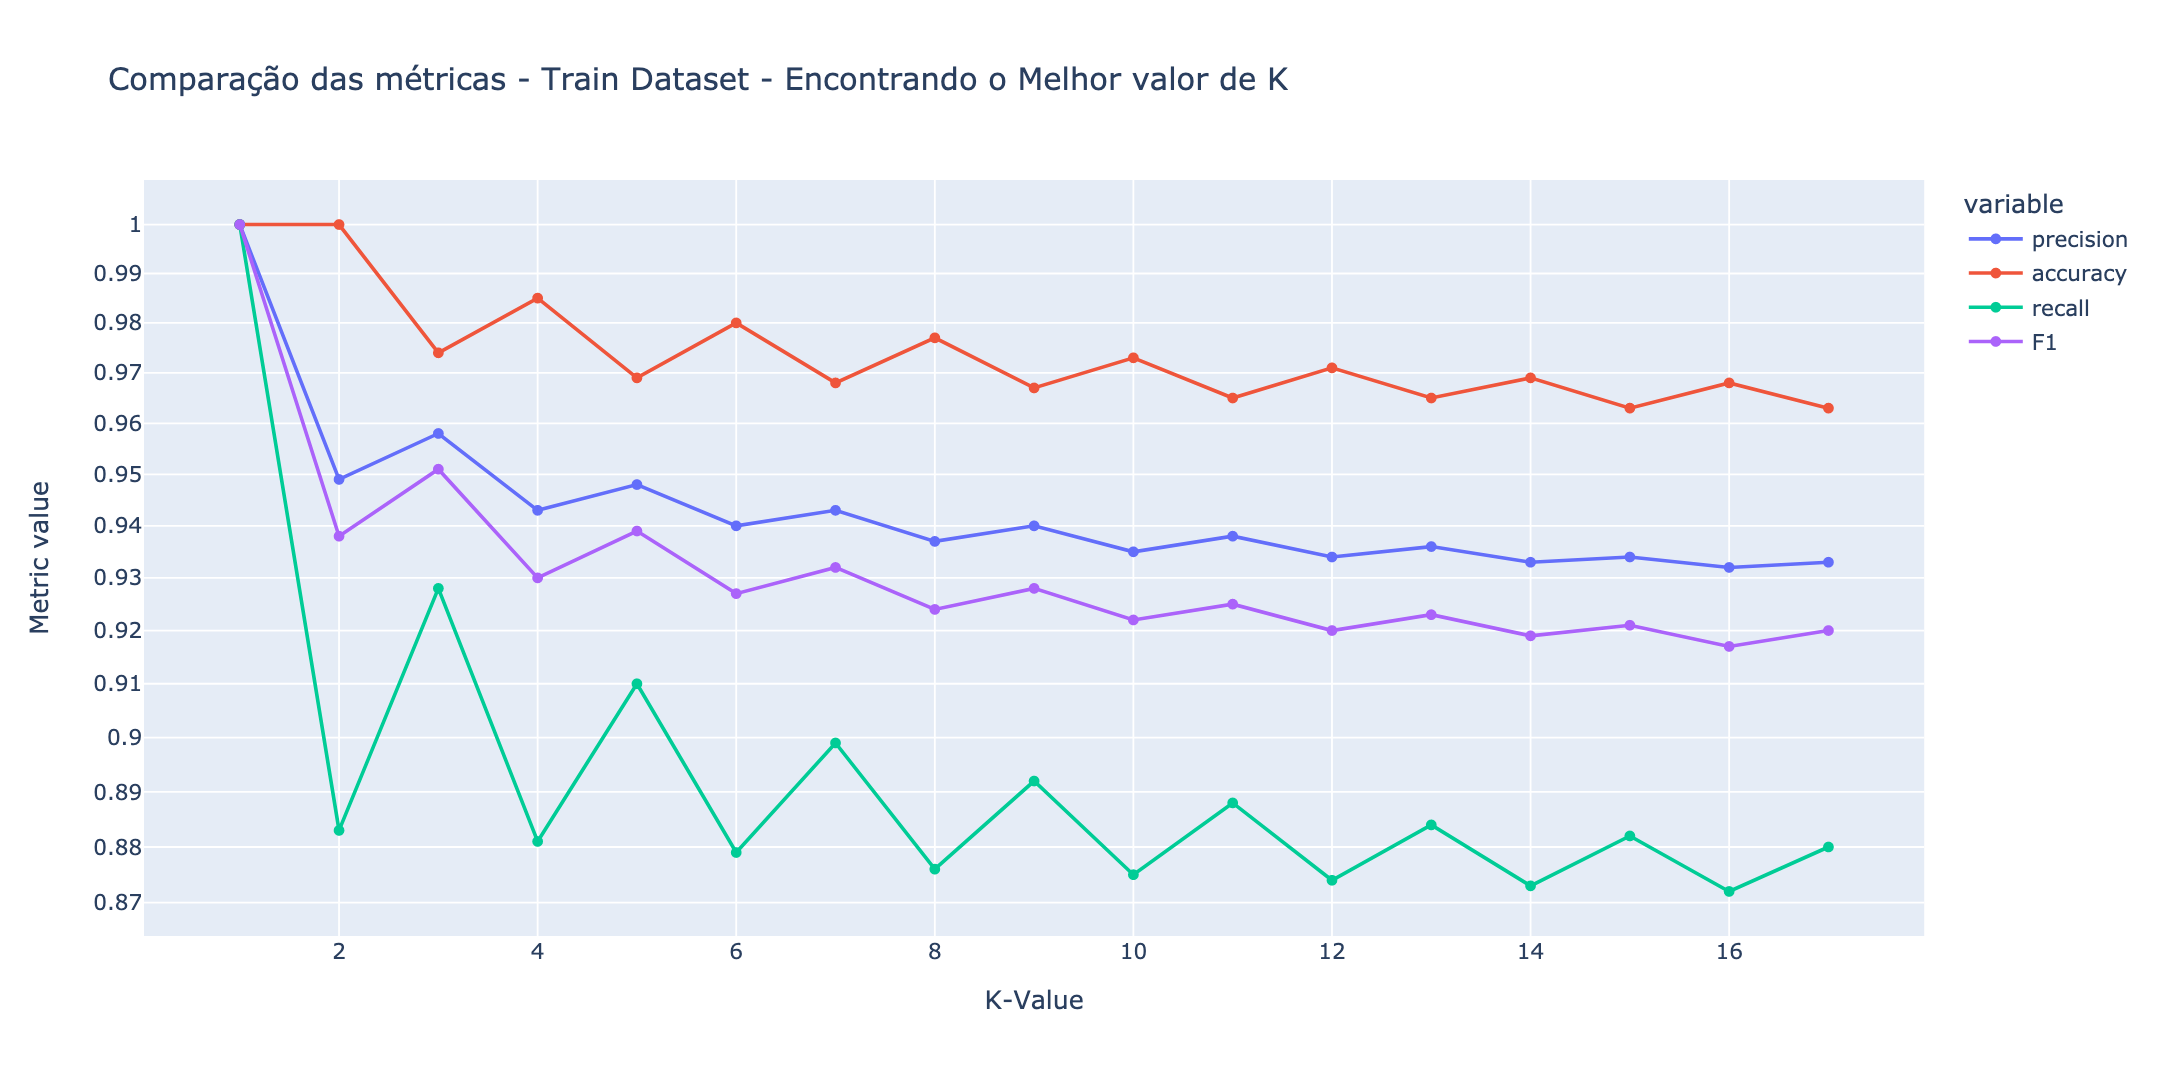

In [11]:
fig = px.line( results_train_knn, x='k_value', y=['precision', 'accuracy', 'recall', 'F1'],
               title="Comparação das métricas - Train Dataset - Encontrando o Melhor valor de K",
               labels={'value': 'Metric value','k_value': 'K-Value'},
               markers=True )  

fig.update_yaxes(type="log")

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)

### 3.2.3 Training Dataset

In [12]:
k = 3 

# model definition
knn = nb.KNeighborsClassifier(n_neighbors=k)

# model training 
knn.fit(X_train, y_train)

# performance 
ypred_train = knn.predict(X_train)

# Metrics 
knn_train_accuracy = mt.accuracy_score(y_train, ypred_train)
knn_train_precision = mt.precision_score(y_train, ypred_train)
knn_train_recall = mt.recall_score(y_train, ypred_train)
knn_train_F1 = mt.f1_score(y_train, ypred_train)

### 3.2.4 Validation Dataset 

In [13]:
# performance 
ypred_vali = knn.predict(X_vali)

# Metrics 
knn_vali_accuracy = mt.accuracy_score(y_vali, ypred_vali)
knn_vali_precision = mt.precision_score(y_vali, ypred_vali)
knn_vali_recall = mt.recall_score(y_vali, ypred_vali)
knn_vali_F1 = mt.f1_score(y_vali, ypred_vali)

### 3.2.5 Test Dataset

In [14]:
# performance 
ypred_test = knn.predict(X_test)

# Metrics 
knn_test_accuracy = mt.accuracy_score(y_test, ypred_test)
knn_test_precision = mt.precision_score(y_test, ypred_test)
knn_test_recall = mt.recall_score(y_test, ypred_test)
knn_test_F1 = mt.f1_score(y_test, ypred_test)

### 3.2.6 - Appending results

In [15]:
knn_train_results = [round(knn_train_accuracy, 3), round(knn_train_precision, 3),
                     round(knn_train_recall, 3), round(knn_train_F1, 3)]
knn_vali_results = [round(knn_vali_accuracy, 3), round(knn_vali_precision, 3),
                     round(knn_vali_recall, 3), round(knn_vali_F1, 3)]
knn_test_results = [round(knn_test_accuracy, 3), round(knn_test_precision, 3),
                     round(knn_test_recall, 3), round(knn_test_F1, 3)]

In [16]:
knn_results_metrics = pd.DataFrame({'Train': knn_train_results, 'Validation': knn_vali_results, 'Test': knn_test_results})
knn_results_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print(f'Resultados das 4 métricas de performance por DataSet no algoritmo KNN : ')
print(knn_results_metrics.to_markdown())

Resultados das 4 métricas de performance por DataSet no algoritmo KNN : 
|           |   Train |   Validation |   Test |
|:----------|--------:|-------------:|-------:|
| Accuracy  |   0.958 |        0.925 |  0.925 |
| Precision |   0.974 |        0.942 |  0.942 |
| Recall    |   0.928 |        0.881 |  0.883 |
| F1 Score  |   0.951 |        0.911 |  0.911 |


## 3.3 - Decision Tree 

### 3.3.1 - Finding the best max_depth for tree

In [17]:
m_depth_values = range(5,50,2)
results_train_dt = pd.DataFrame()

for i in m_depth_values:
    # Model definition 
    dt = tr.DecisionTreeClassifier(max_depth=i)
    
    # Model Training 
    dt.fit(X_train, y_train)
    
    # Performance 
    ypred_train = dt.predict(X_train)
    
    # Metrics 
    dt_train_accuracy = mt.accuracy_score(y_train, ypred_train)
    dt_train_precision = mt.precision_score(y_train, ypred_train)
    dt_train_recall = mt.recall_score(y_train, ypred_train)
    dt_train_F1 = mt.f1_score(y_train, ypred_train)
    
    # Results
    results_train = pd.Series([ i, dt_train_precision, dt_train_accuracy, dt_train_recall, dt_train_F1])
    
    # DataFraming arrays
    results_train_dt = pd.concat([results_train_dt, results_train], axis=1)

results_train_dt.index = ['max_depth', 'accuracy', 'precision', 'recall', 'F1']
results_train_dt.columns = m_depth_values
results_train_dt = results_train_dt.T
results_train_dt.reset_index(drop=True, inplace=True)
results_train_dt = results_train_dt.round(3)

In [18]:
results_train_dt

,max_depth,accuracy,precision,recall,F1
0,5.0,0.908,0.907,0.874,0.890
1,7.0,0.944,0.932,0.896,0.919
2,9.0,0.960,0.947,0.916,0.937
3,11.0,0.964,0.958,0.939,0.951
4,13.0,0.979,0.969,0.949,0.964
5,15.0,0.984,0.978,0.964,0.974
6,17.0,0.992,0.985,0.973,0.982
7,19.0,0.995,0.990,0.982,0.989
8,21.0,0.996,0.994,0.990,0.993
9,23.0,0.998,0.997,0.995,0.997


### 3.3.2 - Ploting Results 

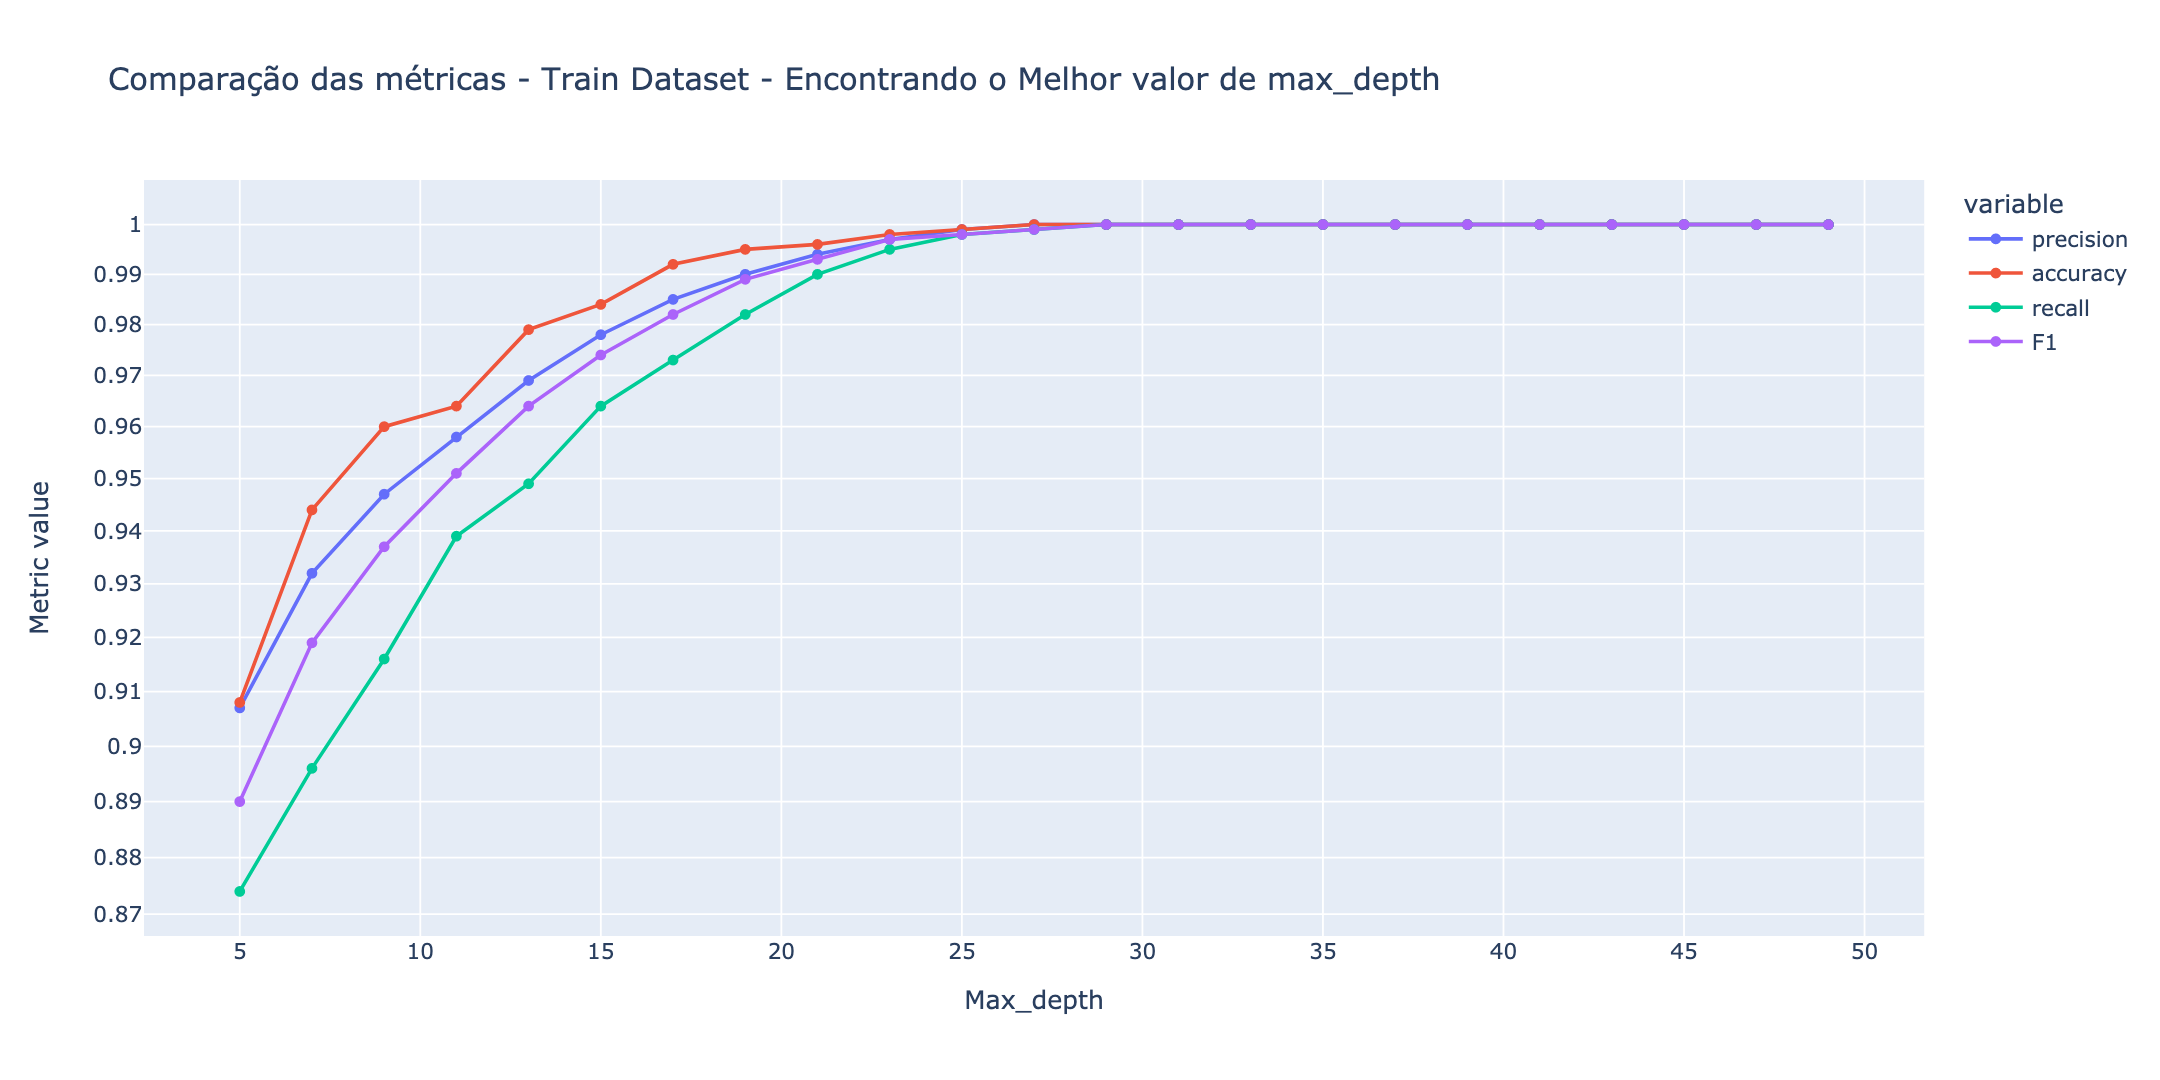

In [19]:
fig = px.line( results_train_dt, x='max_depth', y=['precision', 'accuracy', 'recall', 'F1'],
               title="Comparação das métricas - Train Dataset - Encontrando o Melhor valor de max_depth",
               labels={'value': 'Metric value','max_depth': 'Max_depth'},
               markers=True )  

fig.update_yaxes(type="log")

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)

### 3.3.3 - Training Dataset                                                              

In [20]:
max_depth = 15 

# Model definition 
dt = tr.DecisionTreeClassifier(max_depth=max_depth)

# Model Training 
dt.fit(X_train, y_train)

# Performance 
ypred_train = dt.predict(X_train)

# Metrics 
dt_train_accuracy = mt.accuracy_score(y_train, ypred_train)
dt_train_precision = mt.precision_score(y_train, ypred_train)
dt_train_recall = mt.recall_score(y_train, ypred_train)
dt_train_F1 = mt.f1_score(y_train, ypred_train)

### 3.3.4 - Validation Dataset 

In [21]:
# Performance 
ypred_vali = dt.predict(X_vali)

# Metrics 
dt_vali_accuracy = mt.accuracy_score(y_vali, ypred_vali)
dt_vali_precision = mt.precision_score(y_vali, ypred_vali)
dt_vali_recall = mt.recall_score(y_vali, ypred_vali)
dt_vali_F1 = mt.f1_score(y_vali, ypred_vali)

### 3.3.5 - Test Dataset

In [22]:
#Performance
ypred_test = dt.predict(X_test)

# Metrics 
dt_test_accuracy = mt.accuracy_score(y_test, ypred_test)
dt_test_precision = mt.precision_score(y_test, ypred_test)
dt_test_recall = mt.recall_score(y_test, ypred_test)
dt_test_F1 = mt.f1_score(y_test, ypred_test)

### 3.3.6 - Appending Results 

In [23]:
dt_train_results  = [round(dt_train_accuracy,3), round(dt_train_precision,3), 
                     round(dt_train_recall,3), round(dt_train_F1,3)]
dt_validation_results = [round(dt_vali_accuracy,3), round(dt_vali_precision,3), 
                     round(dt_vali_recall,3), round(dt_vali_F1,3)]
dt_test_results = [round(dt_test_accuracy,3), round(dt_test_precision,3), 
                     round(dt_test_recall,3), round(dt_test_F1,3)]

tree_results_metrics = pd.DataFrame({'Train': dt_train_results, 'Validation': dt_validation_results, 'Test': dt_test_results})
tree_results_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print(f'Resultados das 4 métricas de performance por DataSet no algoritmo Decision Tree : ')
print(tree_results_metrics.to_markdown())


Resultados das 4 métricas de performance por DataSet no algoritmo Decision Tree : 
|           |   Train |   Validation |   Test |
|:----------|--------:|-------------:|-------:|
| Accuracy  |   0.978 |        0.951 |  0.95  |
| Precision |   0.984 |        0.951 |  0.952 |
| Recall    |   0.964 |        0.935 |  0.933 |
| F1 Score  |   0.974 |        0.943 |  0.942 |


## 3.4 - Random Forest 

### 3.4.1 - Finding the best n_estimators for Random Forest 

In [34]:
n_values = range(5,85,5)
results_train_rf = pd.DataFrame()

for n in n_values:
    # Model definition 
    rf_class = en.RandomForestClassifier(n_estimators=n,
                                         max_depth=35)
    
    # Model Training 
    rf_class.fit(X_train, y_train)
    
    # Performance 
    ypred_train = rf_class.predict(X_train)
    
    # Metrics 
    rf_train_accuracy = mt.accuracy_score(y_train, ypred_train)
    rf_train_precision = mt.precision_score(y_train, ypred_train)
    rf_train_recall = mt.recall_score(y_train, ypred_train)
    rf_train_F1 = mt.f1_score(y_train, ypred_train)
    
    # Results
    results_train = pd.Series([ n, rf_train_precision, rf_train_accuracy, rf_train_recall, rf_train_F1])
    
    # DataFraming arrays
    results_train_rf = pd.concat([results_train_rf, results_train], axis=1)

results_train_rf.index = ['n_estimators', 'accuracy', 'precision', 'recall', 'F1']
results_train_rf.columns = n_values
results_train_rf = results_train_rf.T
results_train_rf.reset_index(drop=True, inplace=True)
results_train_rf = results_train_rf.round(3)

In [35]:
results_train_rf

,n_estimators,accuracy,precision,recall,F1
0,5.0,0.996,0.994,0.991,0.993
1,10.0,1.000,0.997,0.994,0.997
2,15.0,1.000,0.999,0.999,0.999
3,20.0,1.000,0.999,0.998,0.999
4,25.0,1.000,1.000,0.999,1.000
5,30.0,1.000,1.000,0.999,1.000
6,35.0,1.000,1.000,1.000,1.000
7,40.0,1.000,1.000,1.000,1.000
8,45.0,1.000,1.000,1.000,1.000
9,50.0,1.000,1.000,1.000,1.000


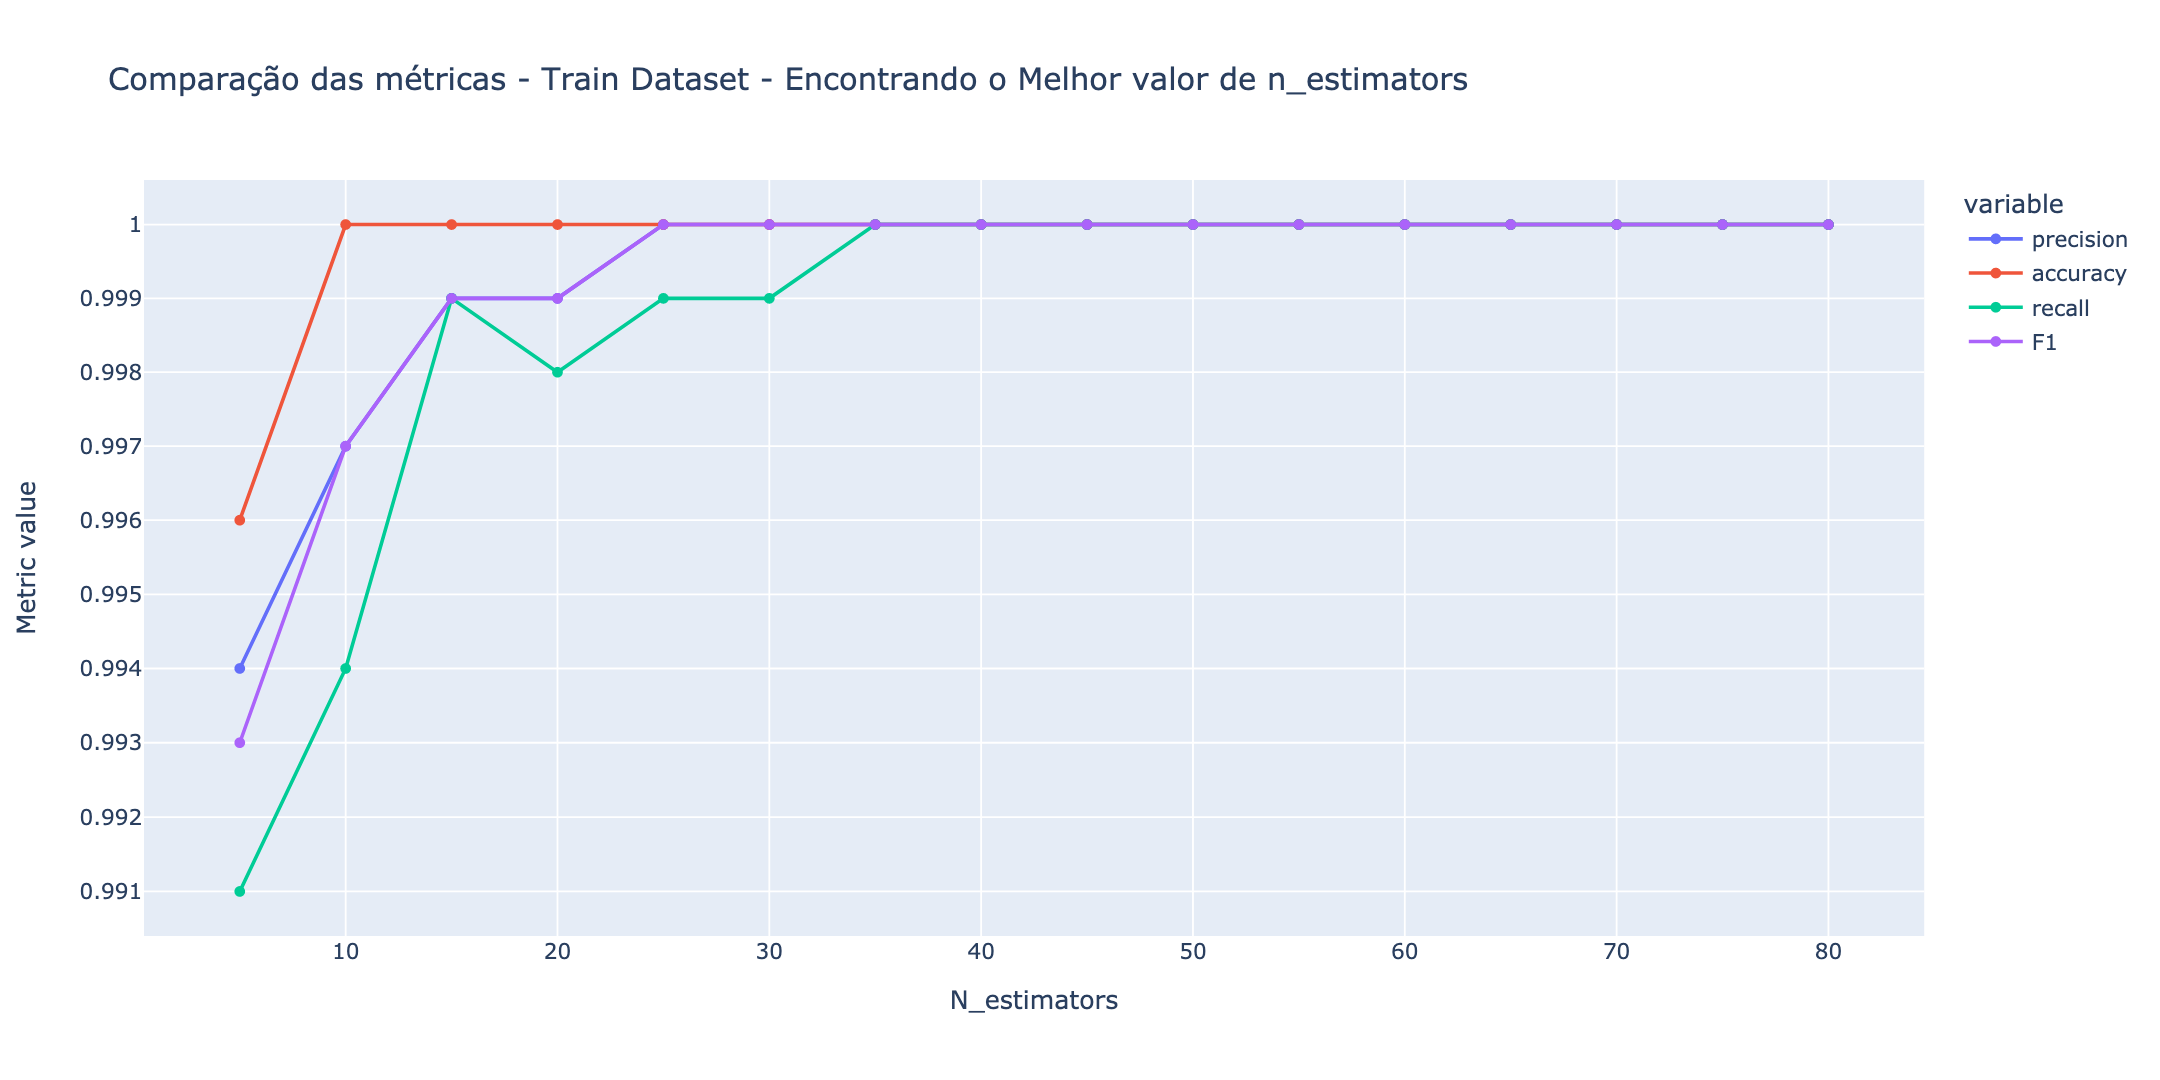

In [36]:
fig = px.line( results_train_rf, x='n_estimators', y=['precision', 'accuracy', 'recall', 'F1'],
               title="Comparação das métricas - Train Dataset - Encontrando o Melhor valor de n_estimators",
               labels={'value': 'Metric value','n_estimators': 'N_estimators'},
               markers=True )  

fig.update_yaxes(type="log")

fig.update_layout(height=600, width=1200)

fig.show('png', scale=1.8)

### 3.4.2 - Training Dataset 

In [37]:
max_depth = 5
n_estimators = 23

# Model Definition
rf = en.RandomForestClassifier(n_estimators= n_estimators,
                               max_depth= max_depth )
# Model training 
rf.fit(X_train, y_train)

# Performance
ypred_train = rf.predict(X_train)

# Metrics 
rf_train_accuracy = mt.accuracy_score(y_train, ypred_train)
rf_train_precision = mt.precision_score(y_train, ypred_train)
rf_train_recall = mt.recall_score(y_train, ypred_train)
rf_train_F1 = mt.f1_score(y_train, ypred_train)

### 3.4.3 - Validation Dataset

In [38]:
# Performance 
ypred_vali = rf.predict(X_vali)

# Metrics 
rf_vali_accuracy = mt.accuracy_score(y_vali, ypred_vali)
rf_vali_precision = mt.precision_score(y_vali, ypred_vali)
rf_vali_recall = mt.recall_score(y_vali, ypred_vali)
rf_vali_F1 = mt.f1_score(y_vali, ypred_vali)

### 3.4.4 - Test Dataset

In [39]:
# Performance 
ypred_test = rf.predict(X_test)

# Metrics 
rf_test_accuracy = mt.accuracy_score(y_test, ypred_test)
rf_test_precision = mt.precision_score(y_test, ypred_test)
rf_test_recall = mt.recall_score(y_test, ypred_test)
rf_test_F1 = mt.f1_score(y_test, ypred_test)

### 3.4.5 - Appending Results 

In [40]:
rf_train_results  = [round(rf_train_accuracy,3), round(rf_train_precision,3), 
                     round(rf_train_recall,3), round(rf_train_F1,3)]
rf_validation_results = [round(rf_vali_accuracy,3), round(rf_vali_precision,3), 
                     round(rf_vali_recall,3), round(rf_vali_F1,3)]
rf_test_results = [round(rf_test_accuracy,3), round(rf_test_precision,3), 
                     round(rf_test_recall,3), round(rf_test_F1,3)]

forest_results_metrics = pd.DataFrame({'Train': rf_train_results, 'Validation': rf_validation_results, 'Test': rf_test_results})
forest_results_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print(f'Resultados das 4 métricas de performance por DataSet no algoritmo Random Forest : ')
print(forest_results_metrics.to_markdown())


Resultados das 4 métricas de performance por DataSet no algoritmo Random Forest : 
|           |   Train |   Validation |   Test |
|:----------|--------:|-------------:|-------:|
| Accuracy  |   0.923 |        0.923 |  0.922 |
| Precision |   0.924 |        0.924 |  0.925 |
| Recall    |   0.895 |        0.896 |  0.895 |
| F1 Score  |   0.909 |        0.91  |  0.91  |


## 3.5 - Logistic Regression 

### 3.5.1 - Finding de best parameters for Logistic Regression 

In [41]:
C_values = np.arange(0.1, 1.1, 0.1)
results_train_logistic = pd.DataFrame()

for c in C_values:
    # Model Definition 
    logistic = lm.LogisticRegression( C=c, 
                                      solver='lbfgs',
                                      max_iter=200)
    # Model Training 
    logistic.fit(X_train, y_train)
    
    # Performance 
    ypred_train = logistic.predict(X_train)
    
    # Metrics 
    log_train_accuracy = mt.accuracy_score(y_train, ypred_train)
    log_train_precision = mt.precision_score(y_train, ypred_train)
    log_train_recall = mt.recall_score(y_train, ypred_train)
    log_train_F1 = mt.f1_score(y_train, ypred_train)
    
    results_train = pd.Series([ c, log_train_accuracy, log_train_precision, log_train_recall, log_train_F1])
    
    # DataFraming arrays
    results_train_logistic = pd.concat([results_train_logistic, results_train], axis=1)
    
results_train_logistic.index = ['C_values', 'accuracy', 'precision', 'recall', 'F1']
results_train_logistic.columns = C_values
results_train_logistic = results_train_logistic.T
results_train_logistic.reset_index(drop=True, inplace=True)
results_train_logistic = results_train_logistic.round(3)

In [42]:
results_train_logistic

,C_values,accuracy,precision,recall,F1
0,0.1,0.874,0.869,0.835,0.852
1,0.2,0.875,0.870,0.836,0.852
2,0.3,0.875,0.870,0.836,0.852
3,0.4,0.875,0.870,0.836,0.852
4,0.5,0.875,0.870,0.836,0.852
5,0.6,0.875,0.870,0.836,0.853
6,0.7,0.875,0.870,0.836,0.853
7,0.8,0.875,0.870,0.836,0.853
8,0.9,0.875,0.870,0.836,0.853
9,1.0,0.875,0.870,0.836,0.853


### 3.5.2 - Training Dataset

In [43]:
c = 0.5

# Model Definition 
logistic = lm.LogisticRegression( C=c, solver='lbfgs', max_iter=250)
# Model Training 
logistic.fit(X_train, y_train)
    
# Performance 
ypred_train = logistic.predict(X_train)
    
# Metrics 
log_train_accuracy = mt.accuracy_score(y_train, ypred_train)
log_train_precision = mt.precision_score(y_train, ypred_train)
log_train_recall = mt.recall_score(y_train, ypred_train)
log_train_F1 = mt.f1_score(y_train, ypred_train)

### 3.5.3 - Validation Dataset 

In [44]:
# Performance 
ypred_vali = logistic.predict(X_vali)

# Metrics 
log_vali_accuracy = mt.accuracy_score(y_vali, ypred_vali)
log_vali_precision = mt.precision_score(y_vali, ypred_vali)
log_vali_recall = mt.recall_score(y_vali, ypred_vali)
log_vali_F1 = mt.f1_score(y_vali, ypred_vali)

### 3.5.4 - Test Dataset

In [45]:
# Performance 
ypred_test = logistic.predict(X_test) 

# Metrics 
log_test_accuracy = mt.accuracy_score(y_test, ypred_test)
log_test_precision = mt.precision_score(y_test, ypred_test)
log_test_recall = mt.recall_score(y_test, ypred_test)
log_test_F1 = mt.f1_score(y_test, ypred_test)

### 3.5.5 - Appending Results 

In [46]:
logistic_train_results = [round(log_train_accuracy,3), round(log_train_precision,3), 
                     round(log_train_recall,3), round(log_train_F1,3)]
logistic_vali_results = [round(log_vali_accuracy,3), round(log_vali_precision,3), 
                     round(log_vali_recall,3), round(log_vali_F1,3)]
logistic_test_results = [round(log_test_accuracy,3), round(log_test_precision,3), 
                     round(log_test_recall,3), round(log_test_F1,3)]

logistic_results_metrics = pd.DataFrame({'Train': logistic_train_results, 'Validation': logistic_vali_results, 'Test': logistic_test_results})
logistic_results_metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print(f'Resultados das 4 métricas de performance por DataSet no algoritmo Logistic Regression : ')
print(logistic_results_metrics.to_markdown())

Resultados das 4 métricas de performance por DataSet no algoritmo Logistic Regression : 
|           |   Train |   Validation |   Test |
|:----------|--------:|-------------:|-------:|
| Accuracy  |   0.875 |        0.874 |  0.872 |
| Precision |   0.87  |        0.869 |  0.869 |
| Recall    |   0.836 |        0.835 |  0.834 |
| F1 Score  |   0.852 |        0.852 |  0.851 |


## 3.6 Concatenating Classification results

### 3.6.1 - Training Results 

In [47]:
train_classification_results = pd.DataFrame({"Metric":['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                                        "KNN": knn_train_results,
                                        "Decision Tree": dt_train_results,
                                        "Random Forest": rf_train_results,
                                        "Logistic Regression": logistic_train_results})

print(train_classification_results.to_markdown())

|    | Metric    |   KNN |   Decision Tree |   Random Forest |   Logistic Regression |
|---:|:----------|------:|----------------:|----------------:|----------------------:|
|  0 | Accuracy  | 0.958 |           0.978 |           0.923 |                 0.875 |
|  1 | Precision | 0.974 |           0.984 |           0.924 |                 0.87  |
|  2 | Recall    | 0.928 |           0.964 |           0.895 |                 0.836 |
|  3 | F1-Score  | 0.951 |           0.974 |           0.909 |                 0.852 |


### 3.6.2 - Validation Results 

In [48]:
val_classification_results = pd.DataFrame({"Metric":['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                                        "KNN": knn_vali_results,
                                        "Decision Tree": dt_validation_results,
                                        "Random Forest": rf_validation_results,
                                        "Logistic Regression": logistic_vali_results})

print(val_classification_results.to_markdown())

|    | Metric    |   KNN |   Decision Tree |   Random Forest |   Logistic Regression |
|---:|:----------|------:|----------------:|----------------:|----------------------:|
|  0 | Accuracy  | 0.925 |           0.951 |           0.923 |                 0.874 |
|  1 | Precision | 0.942 |           0.951 |           0.924 |                 0.869 |
|  2 | Recall    | 0.881 |           0.935 |           0.896 |                 0.835 |
|  3 | F1-Score  | 0.911 |           0.943 |           0.91  |                 0.852 |


### 3.6.3 - Test Results 

In [49]:
test_classification_results = pd.DataFrame({"Metric":['Accuracy', 'Precision', 'Recall', 'F1-Score'], 
                                        "KNN": knn_test_results,
                                        "Decision Tree": dt_test_results,
                                        "Random Forest": rf_test_results,
                                        "Logistic Regression": logistic_test_results})

print(test_classification_results.to_markdown())

|    | Metric    |   KNN |   Decision Tree |   Random Forest |   Logistic Regression |
|---:|:----------|------:|----------------:|----------------:|----------------------:|
|  0 | Accuracy  | 0.925 |           0.95  |           0.922 |                 0.872 |
|  1 | Precision | 0.942 |           0.952 |           0.925 |                 0.869 |
|  2 | Recall    | 0.883 |           0.933 |           0.895 |                 0.834 |
|  3 | F1-Score  | 0.911 |           0.942 |           0.91  |                 0.851 |
